# Problem statement:- predicting the rainfall - it will rain or not

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

In [4]:
data=pd.read_excel('C:\\Users\\Flevin\\Untitled Folder 3\\project.xlsx')

In [23]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
data.isnull().mean() #Evaporation    Sunshine         Cloud9am           Cloud3pm         

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [5]:
# removing columns with more than 20% missing values and segregatting cat and num variables
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [6]:
# filling the missing data of numeric variables with mean
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True)
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [7]:
# loading the names of categorical columns
cat_names = data_cat.columns

In [8]:
# intializing the simple imputer for missing categorical values
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [9]:
# fitting and transforming the missing data
data_cat = imp_mode.fit_transform(data_cat)

In [10]:
# converting array to dataframe
data_cat = pd.DataFrame(data_cat,columns=cat_names)

In [11]:
# concatinating the categorical and numeric data
data = pd.concat([data,data_cat],axis=1)

In [31]:
data.shape

(145460, 19)

In [32]:
data.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
WindGustSpeed       0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Temp9am             0
Temp3pm             0
RainTomorrow     3267
RainToday           0
WindGustDir         0
WindDir9am          0
WindDir3pm          0
dtype: int64

In [14]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Temp9am  Temp3pm RainTomorrow RainToday WindGustDir  \
0       1007.1     16.9     21.8           No        No           W   
1       1007.8     17.2     24.3           No        No         WNW   
2       1008.7     21.0     23.2           No        No         WSW   
3       1012.8     18.1     26.5           No        No          NE   
4       1006.0     17.8     29.7           No        No           W   

  WindDir9am WindDir3pm  
0          W        WNW  
1        NNW        WSW  
2          W        WSW  
3         SE          E  
4        ENE         NW

In [12]:
#importing the labelencoder
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()

In [56]:
#fitting and transforming the categorical data
data['Location'] = le.fit_transform(data['Location'])
data['RainToday'] = le.fit_transform(data['RainToday'])
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])

In [41]:
data['Date'].unique()

array(['2008-12-01T00:00:00.000000000', '2008-12-02T00:00:00.000000000',
       '2008-12-03T00:00:00.000000000', ...,
       '2008-01-29T00:00:00.000000000', '2008-01-30T00:00:00.000000000',
       '2008-01-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
# removing the main column
data.drop(['Date'],axis=1,inplace=True)

In [43]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0         2     13.4     22.9       0.6           44.0          20.0   
1         2      7.4     25.1       0.0           44.0           4.0   
2         2     12.9     25.7       0.0           46.0          19.0   
3         2      9.2     28.0       0.0           24.0          11.0   
4         2     17.5     32.3       1.0           41.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  \
0          24.0         71.0         22.0       1007.7       1007.1     16.9   
1          22.0         44.0         25.0       1010.6       1007.8     17.2   
2          26.0         38.0         30.0       1007.6       1008.7     21.0   
3           9.0         45.0         16.0       1017.6       1012.8     18.1   
4          20.0         82.0         33.0       1010.8       1006.0     17.8   

   Temp3pm RainTomorrow  RainToday  WindGustDir  WindDir9am  WindDir3pm  
0     21.8           No          0           13          13          14  
1     24.3           No          0           14           6          15  
2     23.2           No          0           15          13          15  
3     26.5           No          0            4           9           0  
4     29.7           No          0           13           1           7

In [15]:
data.dropna(axis=0,how='any',inplace=True)

In [45]:
data.shape

(142193, 18)

In [3]:
data.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021605 -0.277921  0.172403    -0.182618 -0.703930   
Temp9am        0.901821  0.887210  0.011192     0.545115  0.291188   
Temp3pm        0.708906  0.984503 -0.079657     0.572893  0.490501   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.177415      0.175064      0.175173    -0.232899   
MaxTemp             0.067615      0.014450      0.050300    -0.504110   
Rainfall            0.133659      0.087338      0.057887     0.224405   
Evaporation         0.203021      0.193084      0.129400    -0.504092   
Sunshine           -0.034750      0.005499      0.053834    -0.490819   
WindGustSpeed       1.000000      0.605303      0.686307    -0.215070   
WindSpeed9am        0.605303      1.000000      0.519547    -0.270858   
WindSpeed3pm        0.686307      0.519547      1.000000    -0.145525   
Humidity9am        -0.215070     -0.270858     -0.145525     1.000000   
Humidity3pm        -0.026327     -0.031614      0.016432     0.666949   
Pressure9am        -0.458744     -0.228743     -0.296351     0.139442   
Pressure3pm        -0.413749     -0.175817     -0.255439     0.186858   
Cloud9am            0.071736      0.025112      0.053337     0.452297   
Cloud3pm            0.109168      0.054639      0.025396     0.357326   
Temp9am             0.150150      0.128545      0.163030    -0.471354   
Temp3pm             0.032748      0.004569      0.027778    -0.498399   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.006089    -0.450970    -0.461292  0.078754  0.021605   
MaxTemp          -0.508855    -0.332061    -0.427167 -0.289370 -0.277921   
Rainfall          0.255755    -0.168154    -0.126534  0.198528  0.172403   
Evaporation      -0.390243    -0.270362    -0.293581 -0.183793 -0.182618   
Sunshine         -0.629130     0.041970    -0.019719 -0.675323 -0.703930   
WindGustSpeed    -0.026327    -0.458744    -0.413749  0.071736  0.109168   
WindSpeed9am     -0.031614    -0.228743    -0.175817  0.025112  0.054639   
WindSpeed3pm      0.016432    -0.296351    -0.255439  0.053337  0.025396   
Humidity9am       0.666949     0.139442     0.186858  0.452297  0.357326   
Humidity3pm       1.000000    -0.027544     0.051997  0.517120  0.523120   
Pressure9am      -0.027544     1.000000     0.961326 -0.129796 -0.147861   
Pressure3pm       0.051997     0.961326     1.000000 -0.060772 -0.084778   
Cloud9am          0.517120    -0.129796    -0.060772  1.000000  0.603564   
Cloud3pm          0.523120    -0.147861    -0.084778  0.603564  1.000000   
Temp9am          -0.221019    -0.422556    -0.470187 -0.136959 -0.126659   
Temp3pm          -0.557841    -0.286770    -0.389548 -0.302060 -0.317420   

                Temp9am   Temp3pm  
MinTemp        0.901821  0.708906  
MaxTemp        0.887210  0.984503  
Rainfall       0.011192 -0.079657  
Evaporation    0.545115  0.572893  
Sunshine       0.291188  0.490501  
WindGustSpeed  0.150150  0.032748  
WindSpeed9am   0.128545  0.004569  
Wi

C:\Users\Flevin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Flevin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


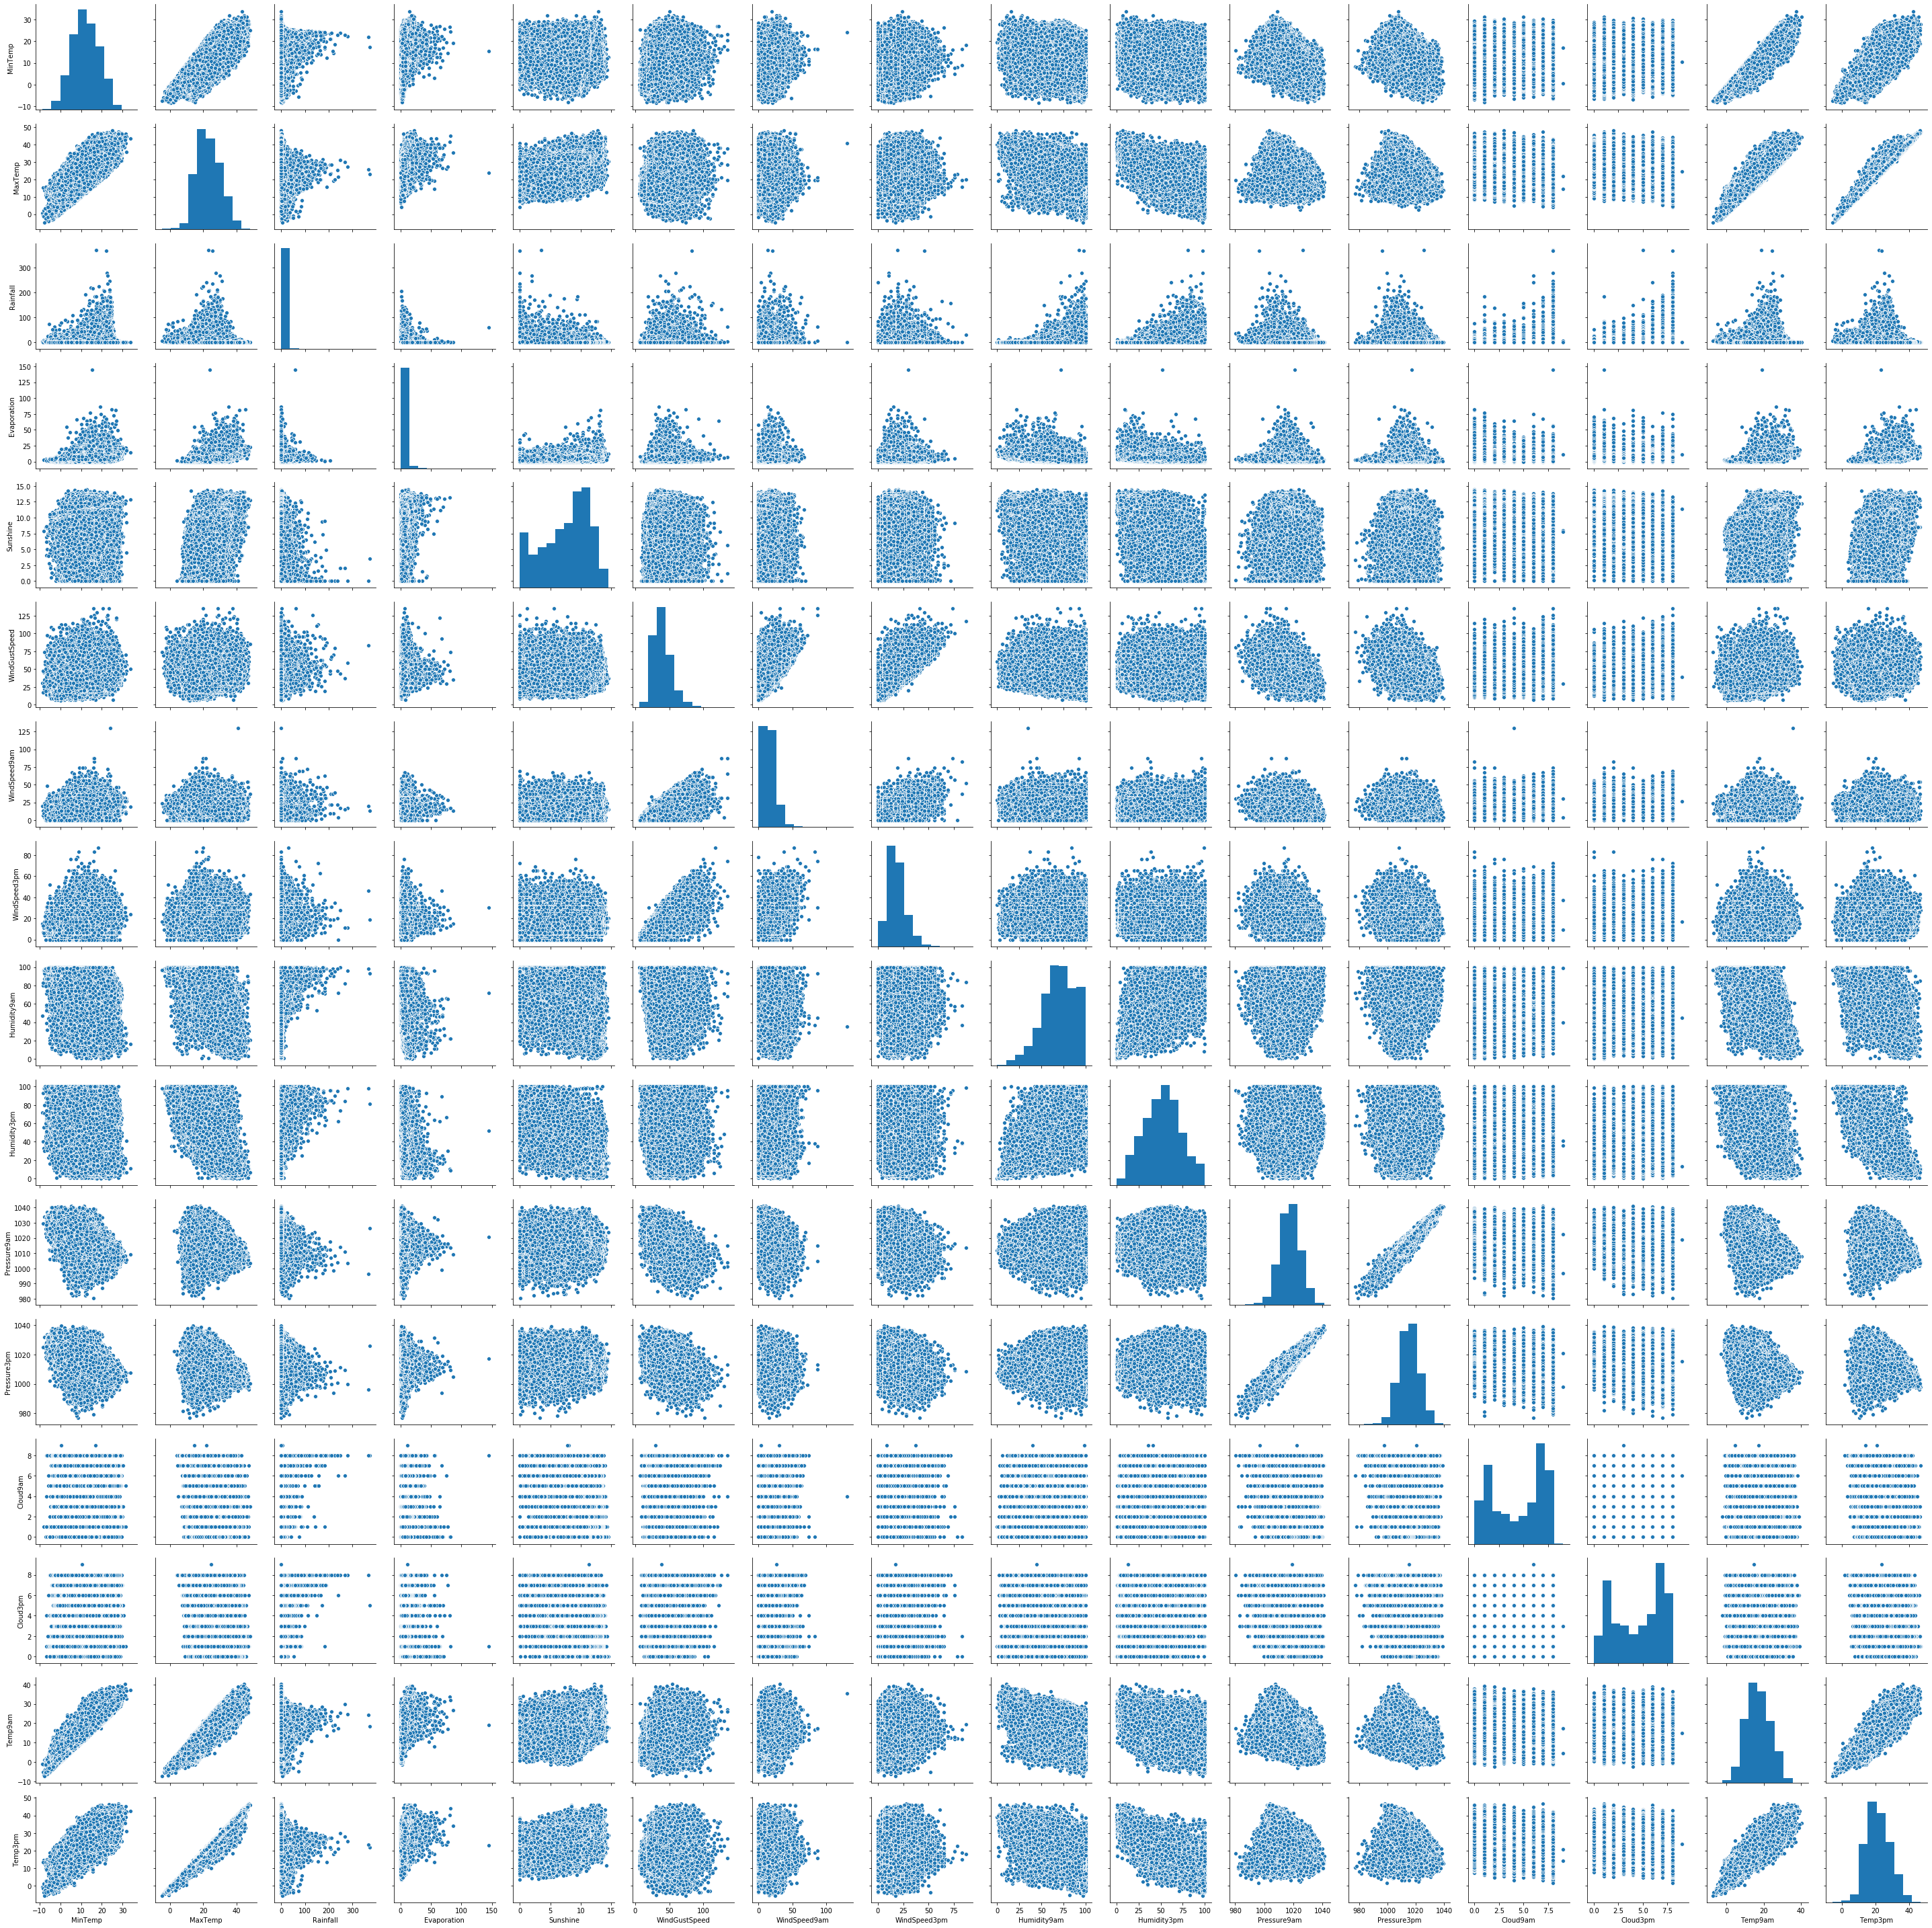

In [8]:
sns.pairplot(data)

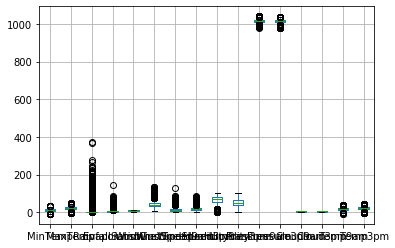

In [6]:
data.boxplot()

In [16]:
from sklearn.preprocessing import StandardScaler

In [57]:
names = x.columns

In [58]:
sc = StandardScaler()

In [59]:
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [60]:
x = sc.fit_transform(x)

In [61]:
x = pd.DataFrame(x,columns=names)

In [62]:
from sklearn import model_selection

In [63]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size =0.2,random_state =0)

In [64]:
x_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm'],
      dtype='object')

In [36]:
import sklearn

In [61]:
#Models intilization of the models
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [62]:
# fitting the model
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train,y_train)
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
GBM.fit(x_train,y_train)
log.fit(x_train,y_train)

C:\Users\Flevin\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:02:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Flevin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Flevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Flevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# predicting the unknown values
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)

In [64]:
#checking the accuraccy score
print("xgboost:",metrics.accuracy_score(y_train,p1))
print("Rand_forest:",metrics.accuracy_score(y_train,p2))
print("svm:",metrics.accuracy_score(y_train,p3))
print("Dtree:",metrics.accuracy_score(y_train,p4))
print("GBM:",metrics.accuracy_score(y_train,p5))
print("log:",metrics.accuracy_score(y_train,p6))

xgboost: 0.8426780596726269
Rand_forest: 0.9865938780174763
svm: 0.854976528297906
Dtree: 0.9999648364013574
GBM: 0.849148161822881
log: 0.83839689153788


In [65]:
# predicting the test unknown values
t1 = XGBoost.predict(x_test)
t2 = Rand_forest.predict(x_test)
t3 = svm.predict(x_test)
t4 = Dtree.predict(x_test)
t5 = GBM.predict(x_test)
t6 = log.predict(x_test)

In [57]:
print("xgboost:",metrics.accuracy_score(y_test,t1))
print("Rand_forest:",metrics.accuracy_score(y_test,t2))
print("svm:",metrics.accuracy_score(y_test,t3))
print("Dtree:",metrics.accuracy_score(y_test,t4))
print("GBM:",metrics.accuracy_score(y_test,t5))
print("log:",metrics.accuracy_score(y_test,t6))

xgboost: 0.8420478919793242
Rand_forest: 0.8573437884595099
svm: 0.8525967861035901
Dtree: 0.7827982699813636
GBM: 0.8499947255529379
log: 0.8418369140968388


# Hyper-parameter tuned Model 

In [69]:
model = ensemble.RandomForestClassifier(criterion='entropy',max_features='sqrt',n_estimators = 25)

In [73]:
model.fit(x_train,y_train)
y_tp= model.predict(x_train)
sklearn.metrics.accuracy_score(y_train,y_tp)

0.9980396293756703

In [74]:
metrics.confusion_matrix(y_train,y_tp)

array([[88225,    24],
       [  199, 25306]], dtype=int64)

In [76]:
y_pred= model.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8532297197510461

In [3]:
import pickle

In [76]:
pickle.dump(model,open('rainfall.pkl','wb'))
pickle.dump(le,open('encoder.pkl','wb'))
pickle.dump(imp_mode,open('impter.pkl','wb'))
pickle.dump(sc,open('scale.pkl','wb'))